<a href="https://colab.research.google.com/github/aayushjha/Lane-detection/blob/master/mnistdigitclassfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten          
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import matplotlib.image as mpimg

In [0]:
np.random.seed(0)

In [0]:
data=mnist.load_data()

In [0]:
len(data)

2

In [0]:
len(data[0])

2

In [0]:
(x_train,y_train),(x_test,y_test)=data

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train[0].shape

(28, 28)

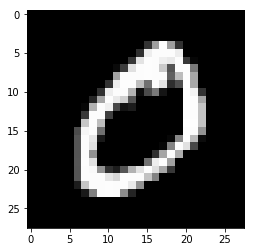

In [0]:
plt.imshow(x_train[1],cmap="gray")
# y_train[1]

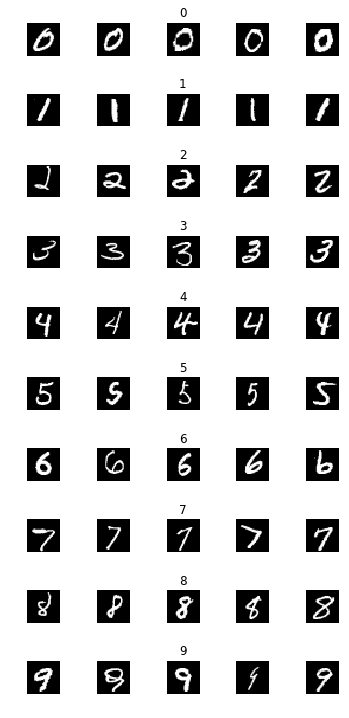

In [0]:
num_of_samples=[]
cols=5
num_classes=10
fig,axs =plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=x_train[y_train==j]
    var=random.randint(0,(len(x_selected)-1))
    axs[j][i].imshow(x_selected[var],cmap="gray")
    axs[j][i].axis("off")
    if i ==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


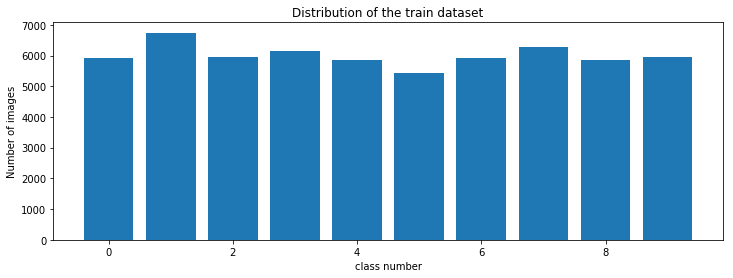

In [0]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)


In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [0]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation="relu"))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation="softmax"))
  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])
  return model

In [0]:
lenet=le_net()
lenet.summary()

W0712 10:45:50.681277 140604206253952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 10:45:50.730742 140604206253952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 10:45:50.738424 140604206253952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 10:45:50.776165 140604206253952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 10:45:50.831347 140604206253952 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [0]:
history=lenet.fit(x_train,y_train,epochs=8,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

W0712 10:45:51.259109 140604206253952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/8
54000/54000 [==============================] - 9s 166us/step - loss: 0.5757 - acc: 0.8186 - val_loss: 0.0958 - val_acc: 0.9720
Epoch 2/8
54000/54000 [==============================] - 2s 38us/step - loss: 0.1448 - acc: 0.9565 - val_loss: 0.0637 - val_acc: 0.9810
Epoch 3/8
54000/54000 [==============================] - 2s 39us/step - loss: 0.1047 - acc: 0.9679 - val_loss: 0.0499 - val_acc: 0.9858
Epoch 4/8
54000/54000 [==============================] - 2s 37us/step - loss: 0.0856 - acc: 0.9734 - val_loss: 0.0427 - val_acc: 0.9875
Epoch 5/8
54000/54000 [==============================] - 2s 38us/step - loss: 0.0735 - acc: 0.9781 - val_loss: 0.0420 - val_acc: 0.9883
Epoch 6/8
54000/54000 [==============================] - 2s 37us/step - loss: 0.0655 - acc: 0.9801 - val_loss: 0.0419 - val_acc: 0.9875
Epoch 7/8
54000/54000 [==============================] - 2s 39us/step - loss: 0.0608 - acc: 0.9816 - val_loss: 0.0372 - val_acc: 0.989

Text(0.5, 0, 'epoch')

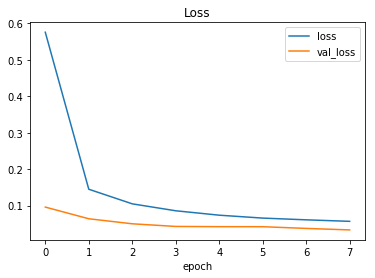

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

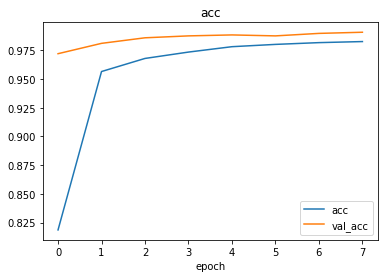

In [0]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.legend(["acc","val_acc"])
plt.title("acc")
plt.xlabel("epoch")

In [0]:
import requests
import io
import cv2 as cv
from PIL import Image
img=requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRRuqbZ7swv3hcKByIo9p5vnT9LIzuIvPd05s5nJdcxGT_k8DIl",stream=True).content
array=io.BytesIO(img)
img1=Image.open(array).convert("L")
import pandas as pd


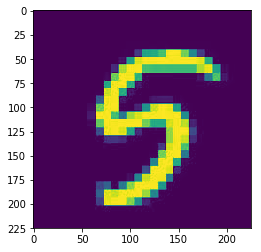

In [0]:
import numpy as np
data=np.array(img1)
plt.imshow(data)

In [0]:
data=cv.resize(data,(28,28))


In [0]:
data=data.reshape(1,28,28,1)

In [0]:
data=data/255

In [0]:
lenet.predict_classes(data)

array([5])

In [0]:
lenet.predict(data)

array([[8.1772304e-11, 4.2051865e-14, 3.2997525e-13, 1.2203559e-07,
        2.8979133e-10, 9.9851984e-01, 1.2893246e-08, 2.0074130e-11,
        7.4465298e-08, 1.4799269e-03]], dtype=float32)

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 1.7MB/s 


In [0]:
link="https://drive.google.com/open?id=1hrTZGDX27Uqxcjt762GeMH11NeOgPUtp"

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you

1hrTZGDX27Uqxcjt762GeMH11NeOgPUtp


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('Meta.csv')  
# df3 = pd.read_csv('Meta.csv')

In [0]:
# df3["Path"].values[0]

'Meta/27.png'

In [0]:
# from io import BytesIO
# uploaded = files.upload()
# im = Image.open(BytesIO(uploaded['o.png']))

In [0]:
!pwd

/content


In [0]:
!ls

adc.json  drive  Meta.csv  sample_data


In [0]:
!mkdir datasets

In [0]:
!ls

adc.json  datasets  drive  Meta.csv  sample_data


In [0]:
!cp -r /content/drive/My\ Drive/gtsrb-german-traffic-sign /content/datasets

In [0]:
!ls datasets

gtsrb-german-traffic-sign


In [0]:
import pandas as pd
basedir="/content/datasets/gtsrb-german-traffic-sign/"
pd.read_csv(basedir+"Test.csv")

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


In [0]:
!mkdir /content/datasets/gtsrb-german-traffic-sign/Train
!tar -xvf /content/datasets/gtsrb-german-traffic-sign/Train.tar -C /content/datasets/gtsrb-german-traffic-sign/Train

./
./0/
./0/00000_00000_00000.png
./0/00000_00000_00001.png
./0/00000_00000_00002.png
./0/00000_00000_00003.png
./0/00000_00000_00004.png
./0/00000_00000_00005.png
./0/00000_00000_00006.png
./0/00000_00000_00007.png
./0/00000_00000_00008.png
./0/00000_00000_00009.png
./0/00000_00000_00010.png
./0/00000_00000_00011.png
./0/00000_00000_00012.png
./0/00000_00000_00013.png
./0/00000_00000_00014.png
./0/00000_00000_00015.png
./0/00000_00000_00016.png
./0/00000_00000_00017.png
./0/00000_00000_00018.png
./0/00000_00000_00019.png
./0/00000_00000_00020.png
./0/00000_00000_00021.png
./0/00000_00000_00022.png
./0/00000_00001_00004.png
./0/00000_00001_00005.png
./0/00000_00001_00006.png
./0/00000_00001_00007.png
./0/00000_00001_00008.png
./0/00000_00001_00009.png
./0/00000_00001_00010.png
./0/00000_00001_00011.png
./0/00000_00001_00012.png
./0/00000_00001_00013.png
./0/00000_00001_00014.png
./0/00000_00001_00015.png
./0/00000_00001_00016.png
./0/00000_00001_00017.png
./0/00000_00001_00018.png
./0/

In [0]:
# !rm -r /content/datasets/gtsrb-german-traffic-sign/

In [0]:
!mkdir /content/datasets/gtsrb-german-traffic-sign/Test
!tar -xvf /content/datasets/gtsrb-german-traffic-sign/Test.tar -C /content/datasets/gtsrb-german-traffic-sign/Test

./
./00000.png
./00001.png
./00002.png
./00003.png
./00004.png
./00005.png
./00006.png
./00007.png
./00008.png
./00009.png
./00010.png
./00011.png
./00012.png
./00013.png
./00014.png
./00015.png
./00016.png
./00017.png
./00018.png
./00020.png
./00021.png
./00022.png
./00023.png
./00024.png
./00025.png
./00026.png
./00027.png
./00028.png
./00029.png
./00030.png
./00031.png
./00032.png
./00033.png
./00034.png
./00035.png
./00036.png
./00037.png
./00038.png
./00040.png
./00041.png
./00042.png
./00043.png
./00044.png
./00045.png
./00046.png
./00047.png
./00048.png
./00049.png
./00050.png
./00051.png
./00052.png
./00053.png
./00054.png
./00055.png
./00056.png
./00057.png
./00058.png
./00060.png
./00061.png
./00062.png
./00063.png
./00064.png
./00065.png
./00066.png
./00067.png
./00068.png
./00069.png
./00070.png
./00071.png
./00072.png
./00073.png
./00074.png
./00075.png
./00076.png
./00077.png
./00078.png
./00080.png
./00081.png
./00082.png
./00083.png
./00084.png
./00085.png
./00086.png
.

In [0]:
import os
os.listdir(basedir+"Train")
df=pd.read_csv(basedir+"Train.csv")
dt=df.loc[:,["ClassId","Path"]]

In [0]:
images=[]
labels=[]
from PIL import Image
import numpy as np
for slot in dt.values:
  im=Image.open(basedir+slot[1])
  images.append(np.array(im))
  labels.append(slot[0])
train={"images":images,"labels":labels}

In [0]:
# import matplotlib.pyplot as plt
# plt.imshow(images[100])
len(labels)

39209

In [0]:
import pickle
with open(basedir+"Train.pkl","wb") as f:
  f.write(pickle.dumps(train))